Cargué el archivo .csv e hice una visualizacion de las filas del dataframe

# EDA - Analisis exploratorio de los Datos

In [210]:
import pandas as pd

# Cargar el archivo CSV
file_path = 'monkeypox.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataframe para entender su estructura
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79045 entries, 0 to 79044
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   location                         79045 non-null  object 
 1   date                             79045 non-null  object 
 2   iso_code                         73455 non-null  object 
 3   total_cases                      79033 non-null  float64
 4   total_deaths                     79033 non-null  float64
 5   new_cases                        79033 non-null  float64
 6   new_deaths                       79033 non-null  float64
 7   new_cases_smoothed               79033 non-null  float64
 8   new_deaths_smoothed              79033 non-null  float64
 9   new_cases_per_million            79033 non-null  float64
 10  total_cases_per_million          79033 non-null  float64
 11  new_cases_smoothed_per_million   79033 non-null  float64
 12  new_deaths_per_mil

(  location        date iso_code  total_cases  total_deaths  new_cases  \
 0   Africa  2022-05-01      NaN         42.0           2.0        2.0   
 1   Africa  2022-05-02      NaN         42.0           2.0        0.0   
 2   Africa  2022-05-03      NaN         42.0           2.0        0.0   
 3   Africa  2022-05-04      NaN         42.0           2.0        0.0   
 4   Africa  2022-05-05      NaN         42.0           2.0        0.0   
 
    new_deaths  new_cases_smoothed  new_deaths_smoothed  new_cases_per_million  \
 0         0.0                0.29                  0.0                  0.001   
 1         0.0                0.29                  0.0                  0.000   
 2         0.0                0.29                  0.0                  0.000   
 3         0.0                0.29                  0.0                  0.000   
 4         0.0                0.29                  0.0                  0.000   
 
    total_cases_per_million  new_cases_smoothed_per_million 

Ver los valores nulos por columna

In [211]:
# Convertir la columna 'date' a formato datetime
data['date'] = pd.to_datetime(data['date'])

# Verificar si hay valores nulos en el dataset
missing_values = data.isnull().sum()

# Mostrar los valores nulos por columna
missing_values

,0
location,0
date,0
iso_code,5590
total_cases,12
total_deaths,12
new_cases,12
new_deaths,12
new_cases_smoothed,12
new_deaths_smoothed,12
new_cases_per_million,12


Elimine la columna iso code ya que tenia la mayor cantidad de datos nulos y otras columnas relacionadas como new cases, deaths, etc....

In [212]:
# Eliminar la columna 'iso_code'
data_cleaned = data.drop(columns=['iso_code'])

# Eliminar filas donde las columnas con valores nulos tengan 0
columns_with_nans = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths',
                     'new_cases_smoothed', 'new_deaths_smoothed',
                     'new_cases_per_million', 'total_cases_per_million',
                     'new_cases_smoothed_per_million', 'new_deaths_per_million',
                     'total_deaths_per_million', 'new_deaths_smoothed_per_million']

# Mantener filas donde las columnas mencionadas no tienen nulos
data_cleaned = data_cleaned.dropna(subset=columns_with_nans)

# Verificar el nuevo número de filas y columnas
data_cleaned.shape

(79033, 14)

Genere un nuevo archivo limpio.

In [213]:
# Guardar el DataFrame limpio en un nuevo archivo CSV
output_path = 'cleaned_monkeypox.csv'
data_cleaned.to_csv(output_path, index=False)

output_path

'cleaned_monkeypox.csv'

In [214]:
# Resumen estadístico de las columnas numéricas
data_cleaned.describe()

,date,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million
count,79033,79033.000000,79033.000000,79033.000000,79033.000000,79033.000000,79033.000000,79033.000000,79033.000000,79033.000000,79033.000000,79033.000000,79033.000000
mean,2023-06-24 11:08:35.496058880,2361.854959,4.079423,3.771058,0.007820,3.766063,0.007794,0.035099,22.177762,0.034875,0.000052,0.023912,0.000052
min,2022-05-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022-12-22 00:00:00,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.550000,0.000000,0.000000,0.000000,0.000000
50%,2023-06-25 00:00:00,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.789000,0.000000,0.000000,0.000000,0.000000
75%,2023-12-26 00:00:00,331.000000,0.000000,0.000000,0.000000,0.140000,0.000000,0.000000,31.639000,0.001000,0.000000,0.000000,0.000000
max,2024-07-28 00:00:00,99388.000000,208.000000,5319.000000,10.000000,1076.290000,1.710000,91.804000,183.591000,17.443000,0.224470,0.583830,0.031430
std,NaN,9916.078106,18.280689,73.351658,0.165747,32.977527,0.065121,0.620533,32.456242,0.259445,0.002085,0.067955,0.000777


Procesar los datos para el modelo Holt-Winters y realizar la prueba de raiz unitaria para verificar la estacionariedad. Nos damos cuenta que el valor de p sugiere que la serie no es estacionaria.

In [215]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

# Agrupar los datos por fecha y sumar los casos nuevos para manejar duplicados
data_daily = data_cleaned.groupby('date')['new_cases'].sum().reset_index()
data_daily.set_index('date', inplace=True)
data_daily = data_daily.asfreq('D').fillna(0)  # Asegurar frecuencia diaria

# Decomposición de la serie temporal
result = seasonal_decompose(data_daily['new_cases'], model='additive', extrapolate_trend='freq')

# Modelo de Holt-Winters
model_hw = ExponentialSmoothing(data_daily['new_cases'],
                                trend='add', seasonal='add',
                                seasonal_periods=365).fit()

# Predicción para los últimos 30 días en el dataset
prediction_hw = model_hw.forecast(30)

# Prueba de Dickey-Fuller Aumentada para verificar estacionariedad
adf_result = adfuller(data_daily['new_cases'])

result, prediction_hw.head(), adf_result

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


(<statsmodels.tsa.seasonal.DecomposeResult at 0x7b59a3e8b550>,
 2024-07-29    32.268841
 2024-07-30    68.560319
 2024-07-31    98.225886
 2024-08-01     5.522781
 2024-08-02     9.952357
 Freq: D, dtype: float64,
 (-2.419031048184143,
  0.1364369201848561,
  20,
  799,
  {'1%': -3.4385608049885876,
   '5%': -2.865164107438179,
   '10%': -2.5686998068142124},
  11887.542497308435))

In [216]:
# Asumiendo que ya tienes cargado el DataFrame 'data_global' con los datos globales
# La columna 'new_cases' contiene los casos diarios

# Calcular la desviación estándar de los casos globales
std_new_cases = data_global['new_cases'].std()

# Mostrar el resultado
print(f"La desviación estándar de los casos globales es: {std_new_cases}")

La desviación estándar de los casos globales es: 1560.6558590281682


Aplico una diferenciacion de primer orden y los resultados de Dickey-Fuller muestran que ahora la serie es estacionaria, lo que me permitira modelar con el metodo ARIMA.

In [217]:
# Diferenciación de la serie temporal para hacerla estacionaria
data_daily_diff = data_daily['new_cases'].diff().dropna()  # Diferencia de primer orden

# Revisión de la serie temporal diferenciada
result_diff = seasonal_decompose(data_daily_diff, model='additive', extrapolate_trend='freq')

# Nueva prueba de Dickey-Fuller Aumentada para verificar estacionariedad
adf_result_diff = adfuller(data_daily_diff)

result_diff, adf_result_diff

(<statsmodels.tsa.seasonal.DecomposeResult at 0x7b59a37f7ee0>,
 (-4.219110447549549,
  0.0006115031552703222,
  19,
  799,
  {'1%': -3.4385608049885876,
   '5%': -2.865164107438179,
   '10%': -2.5686998068142124},
  11877.607610316623))

La diferenciación ha ayudado a estabilizar la media, haciendo la serie más adecuada para el análisis con modelos de series temporales como ARIMA.

Observamos cómo las fluctuaciones y la varianza se mantienen más consistentes a lo largo del tiempo, lo cual es un buen indicativo para proceder con el modelado.

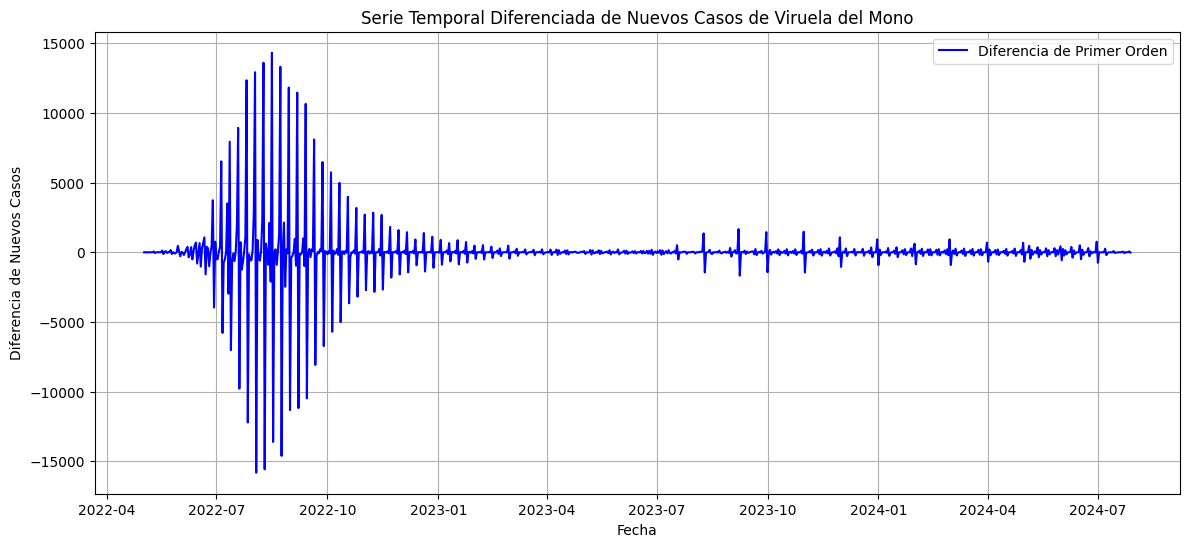

In [218]:
import matplotlib.pyplot as plt

# Visualizar la serie temporal diferenciada
plt.figure(figsize=(14, 6))
plt.plot(data_daily_diff, label='Diferencia de Primer Orden', color='blue')
plt.title('Serie Temporal Diferenciada de Nuevos Casos de Viruela del Mono')
plt.xlabel('Fecha')
plt.ylabel('Diferencia de Nuevos Casos')
plt.legend()
plt.grid(True)
plt.show()

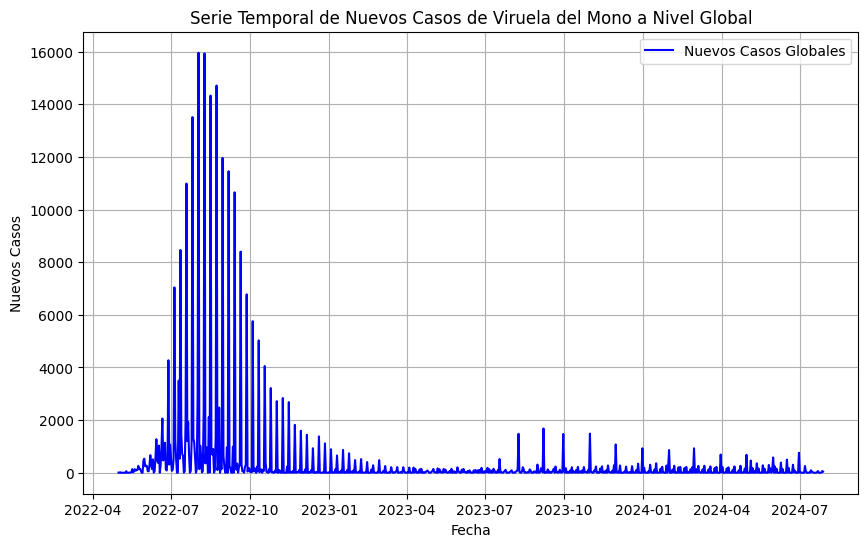

In [219]:
# Graficar la serie temporal de nuevos casos de viruela del mono a nivel global
plt.figure(figsize=(10,6))
plt.plot(data_global.index, data_global['new_cases'], label='Nuevos Casos Globales', color='b')
plt.title('Serie Temporal de Nuevos Casos de Viruela del Mono a Nivel Global')
plt.xlabel('Fecha')
plt.ylabel('Nuevos Casos')
plt.grid(True)
plt.legend()
plt.show()

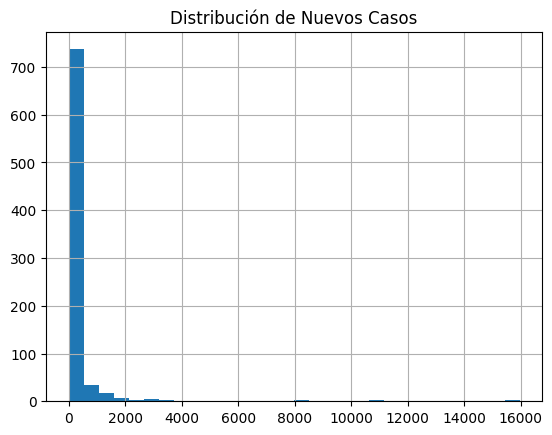

In [220]:
data_global['new_cases'].hist(bins=30)
plt.title('Distribución de Nuevos Casos')
plt.show()

# ARIMA

In [221]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA con p=1, d=1, q=1
model = ARIMA(data_global['new_cases'], order=(1, 1, 1))
fitted_model = model.fit()

# Mostrar resumen del modelo
print(fitted_model.summary())

# Realizar predicciones para los próximos 30 días
predictions = fitted_model.forecast(steps=30)
print(predictions)

                               SARIMAX Results                                
Dep. Variable:              new_cases   No. Observations:                  820
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7129.215
Date:                Sat, 07 Sep 2024   AIC                          14264.431
Time:                        22:52:31   BIC                          14278.555
Sample:                    05-01-2022   HQIC                         14269.851
                         - 07-28-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0970      0.032     -3.070      0.002      -0.159      -0.035
ma.L1         -0.9448      0.008   -115.570      0.000      -0.961      -0.929
sigma2      2.126e+06   2.75e+04     77.278      0.0

In [222]:
# Cargar el archivo CSV
data = pd.read_csv('cleaned_monkeypox.csv')

# Trabajamos con los datos globales
data_global = data.copy()

# Mostrar las primeras filas para asegurarnos de que se cargaron los datos correctamente
print(data_global.head())

  location        date  total_cases  total_deaths  new_cases  new_deaths  \
0   Africa  2022-05-01         42.0           2.0        2.0         0.0   
1   Africa  2022-05-02         42.0           2.0        0.0         0.0   
2   Africa  2022-05-03         42.0           2.0        0.0         0.0   
3   Africa  2022-05-04         42.0           2.0        0.0         0.0   
4   Africa  2022-05-05         42.0           2.0        0.0         0.0   

   new_cases_smoothed  new_deaths_smoothed  new_cases_per_million  \
0                0.29                  0.0                  0.001   
1                0.29                  0.0                  0.000   
2                0.29                  0.0                  0.000   
3                0.29                  0.0                  0.000   
4                0.29                  0.0                  0.000   

   total_cases_per_million  new_cases_smoothed_per_million  \
0                     0.03                             0.0   
1   

In [223]:
# Ajustar el modelo ARIMA sin diferenciación
model = ARIMA(data_global['new_cases'], order=(1, 1, 1))
fitted_model = model.fit()

# Predicciones
predictions = fitted_model.forecast(steps=30)
print(predictions)

79033    13.735232
79034    13.875181
79035    13.859695
79036    13.861409
79037    13.861219
79038    13.861240
79039    13.861238
79040    13.861238
79041    13.861238
79042    13.861238
79043    13.861238
79044    13.861238
79045    13.861238
79046    13.861238
79047    13.861238
79048    13.861238
79049    13.861238
79050    13.861238
79051    13.861238
79052    13.861238
79053    13.861238
79054    13.861238
79055    13.861238
79056    13.861238
79057    13.861238
79058    13.861238
79059    13.861238
79060    13.861238
79061    13.861238
79062    13.861238
Name: predicted_mean, dtype: float64


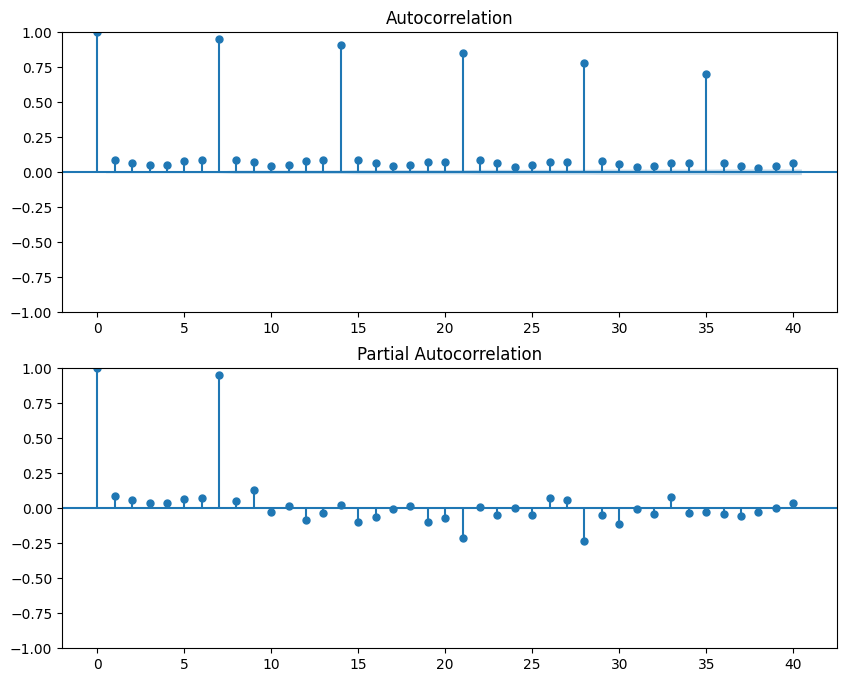

In [224]:
import statsmodels.api as sm

# Asumiendo que 'data_global' ya está preparada y es estacionaria
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig = sm.graphics.tsa.plot_acf(data_global['new_cases'], lags=40, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(data_global['new_cases'], lags=40, ax=ax[1])
plt.show()

In [225]:
# Ajustar el modelo ARIMA con p=1, d=1, q=1
model = ARIMA(data_global['new_cases'], order=(1, 1, 1))
fitted_model = model.fit()

# Mostrar resumen del modelo
print(fitted_model.summary())

# Realizar predicciones para los próximos 30 días
predictions = fitted_model.forecast(steps=30)
print(predictions)

                               SARIMAX Results                                
Dep. Variable:              new_cases   No. Observations:                79033
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -445521.893
Date:                Sat, 07 Sep 2024   AIC                         891049.786
Time:                        22:53:03   BIC                         891077.619
Sample:                             0   HQIC                        891058.323
                              - 79033                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1107      0.001   -189.037      0.000      -0.112      -0.110
ma.L1         -0.9466      0.000  -6754.895      0.000      -0.947      -0.946
sigma2      4612.6609      1.070   4311.066      0.0

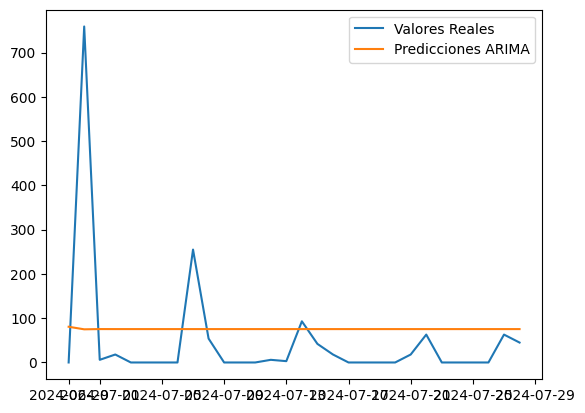

In [226]:
plt.plot(test.index, test, label='Valores Reales')
plt.plot(arima_predictions.index, arima_predictions, label='Predicciones ARIMA')
plt.legend()
plt.show()

In [227]:
from sklearn.metrics import mean_squared_error

# Divide los datos en entrenamiento y prueba
train = data_global['new_cases'][:-30]
test = data_global['new_cases'][-30:]

# Ajustar el modelo ARIMA en el conjunto de entrenamiento
model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

# Realizar predicciones para el conjunto de prueba
predictions = fitted_model.forecast(steps=len(test))

# Calcular el MAPE
def mape_adjusted(y_true, y_pred):
    mask = y_true != 0  # Filtrar valores donde y_true no es 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

mape_result_adjusted = mape_adjusted(test, predictions)
print("MAPE ajustado:", mape_result_adjusted)

# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print("RMSE:", rmse)

def mape_handle_zeros(y_true, y_pred):
    y_true = np.where(y_true == 0, 1e-5, y_true)  # Reemplazar ceros con un valor pequeño
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_result_handle_zeros = mape_handle_zeros(test, predictions)
print("MAPE con manejo de ceros:", mape_result_handle_zeros)

MAPE ajustado: 438.18141289596656
RMSE: 47.96186487576028
MAPE con manejo de ceros: 135584014.95490494


In [228]:
print("Valores reales (test):", test)
print("\nPredicciones:", predictions)

Valores reales (test): 79003      0.0
79004    253.0
79005      2.0
79006      6.0
79007      0.0
79008      0.0
79009      0.0
79010      0.0
79011     85.0
79012     18.0
79013      0.0
79014      0.0
79015      0.0
79016      2.0
79017      1.0
79018     31.0
79019     14.0
79020      6.0
79021      0.0
79022      0.0
79023      0.0
79024      0.0
79025      6.0
79026     21.0
79027      0.0
79028      0.0
79029      0.0
79030      0.0
79031     21.0
79032     15.0
Name: new_cases, dtype: float64

Predicciones: 79003    27.319935
79004    25.071400
79005    25.320215
79006    25.292682
79007    25.295729
79008    25.295392
79009    25.295429
79010    25.295425
79011    25.295426
79012    25.295426
79013    25.295426
79014    25.295426
79015    25.295426
79016    25.295426
79017    25.295426
79018    25.295426
79019    25.295426
79020    25.295426
79021    25.295426
79022    25.295426
79023    25.295426
79024    25.295426
79025    25.295426
79026    25.295426
79027    25.295426
79028

In [229]:
error_percent = np.abs((test - predictions) / (test + 1e-5)) * 100  # Añadir valor pequeño para evitar división por cero
print(error_percent)  # Revisa el porcentaje de error en cada punto

79003    2.731994e+08
79004    9.009035e+01
79005    1.166005e+03
79006    3.215442e+02
79007    2.529573e+08
79008    2.529539e+08
79009    2.529543e+08
79010    2.529543e+08
79011    7.024067e+01
79012    4.053012e+01
79013    2.529543e+08
79014    2.529543e+08
79015    2.529543e+08
79016    1.164765e+03
79017    2.429518e+03
79018    1.840185e+01
79019    8.068155e+01
79020    3.215899e+02
79021    2.529543e+08
79022    2.529543e+08
79023    2.529543e+08
79024    2.529543e+08
79025    3.215899e+02
79026    2.045440e+01
79027    2.529543e+08
79028    2.529543e+08
79029    2.529543e+08
79030    2.529543e+08
79031    2.045440e+01
79032    6.863612e+01
dtype: float64


In [230]:
mae_result = mean_absolute_error(test, predictions)
print("MAE:", mae_result)

MAE: 28.878702256792995


# HOLT - WINTERS

In [231]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Cargar y preparar los datos globales
data_global = data[['date', 'new_cases']].copy()

# Convertir la columna de fechas al formato datetime
data_global['date'] = pd.to_datetime(data_global['date'])

# Eliminar duplicados basados en la columna 'date', sumando los casos duplicados (puedes ajustarlo según tus necesidades)
data_global = data_global.groupby('date').sum().reset_index()

# Establecer la columna de fechas como índice
data_global.set_index('date', inplace=True)

# Asegurarse de que los datos estén en frecuencia diaria y rellenar los valores faltantes
data_global = data_global[['new_cases']].asfreq('D').ffill()

# Mostrar las primeras filas para verificar
print(data_global.head())

            new_cases
date                 
2022-05-01        6.0
2022-05-02        0.0
2022-05-03       18.0
2022-05-04        0.0
2022-05-05        0.0


In [232]:
# Ajustar el modelo Holt-Winters con tendencia y estacionalidad aditiva
hw_model = ExponentialSmoothing(
    data_global['new_cases'],
    trend='add',
    seasonal='add',
    seasonal_periods=7  # Suponemos estacionalidad semanal
).fit()

# Hacer predicciones para los próximos 30 días
hw_forecast = hw_model.forecast(steps=30)

# Mostrar las predicciones
print(hw_forecast)

2024-07-29    62.811896
2024-07-30     1.249899
2024-07-31     0.627798
2024-08-01     0.626508
2024-08-02     0.634724
2024-08-03    61.076370
2024-08-04    21.756294
2024-08-05    63.012829
2024-08-06     1.450832
2024-08-07     0.828731
2024-08-08     0.827441
2024-08-09     0.835657
2024-08-10    61.277303
2024-08-11    21.957227
2024-08-12    63.213763
2024-08-13     1.651765
2024-08-14     1.029664
2024-08-15     1.028374
2024-08-16     1.036590
2024-08-17    61.478237
2024-08-18    22.158160
2024-08-19    63.414696
2024-08-20     1.852699
2024-08-21     1.230598
2024-08-22     1.229307
2024-08-23     1.237523
2024-08-24    61.679170
2024-08-25    22.359094
2024-08-26    63.615629
2024-08-27     2.053632
Freq: D, dtype: float64


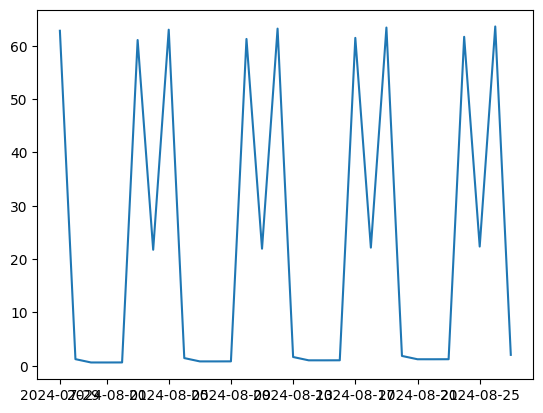

In [233]:
hw_predictions = hw_model.forecast(steps=30)
plt.plot(hw_predictions.index, hw_predictions, label='Predicciones Holt-Winters')
plt.show()

In [234]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define el conjunto de prueba (por ejemplo, los últimos 30 días de datos reales)
test = data_global['new_cases'][-30:]  # Últimos 30 días reales

# Asegurarse de que los índices coinciden
predictions.index = test.index  # Alinear el índice de las predicciones con el de los datos de prueba

# Calcular MAD
mad = mean_absolute_error(test, predictions)
print(f"MAD: {mad}")

# Calcular MAPE (ajustado para evitar ceros)
def mape(y_true, y_pred):
    mask = y_true != 0  # Evitar divisiones por cero
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

mape_result = mape(test, predictions)
print(f"MAPE: {mape_result}")

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f"RMSE: {rmse}")

MAD: 55.38022707903118
MAPE: 144.59586441154283
RMSE: 142.83794977743742


# Comparación

In [235]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Divide los datos en entrenamiento y prueba (por ejemplo, últimos 30 días como prueba)
train = data_global['new_cases'][:-30]
test = data_global['new_cases'][-30:]

# ------------------------------------
# Ajustar el modelo ARIMA
arima_model = ARIMA(train, order=(1, 1, 1))
fitted_arima = arima_model.fit()

# Predicciones del modelo ARIMA
arima_predictions = fitted_arima.forecast(steps=len(test))
arima_predictions.index = test.index  # Alinear el índice

# ------------------------------------
# Ajustar el modelo Holt-Winters
hw_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7).fit()

# Predicciones del modelo Holt-Winters
hw_predictions = hw_model.forecast(steps=len(test))
hw_predictions.index = test.index  # Alinear el índice

# ------------------------------------
# Calcular MAD para ARIMA y Holt-Winters
mad_arima = mean_absolute_error(test, arima_predictions)
mad_hw = mean_absolute_error(test, hw_predictions)

print(f"MAD ARIMA: {mad_arima}")
print(f"MAD Holt-Winters: {mad_hw}")

# ------------------------------------
# Calcular MAPE para ARIMA y Holt-Winters
def mape(y_true, y_pred):
    mask = y_true != 0  # Evitar divisiones por cero
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

mape_arima = mape(test, arima_predictions)
mape_hw = mape(test, hw_predictions)

print(f"MAPE ARIMA: {mape_arima}")
print(f"MAPE Holt-Winters: {mape_hw}")

# ------------------------------------
# Calcular RMSE para ARIMA y Holt-Winters
rmse_arima = np.sqrt(mean_squared_error(test, arima_predictions))
rmse_hw = np.sqrt(mean_squared_error(test, hw_predictions))

print(f"RMSE ARIMA: {rmse_arima}")
print(f"RMSE Holt-Winters: {rmse_hw}")

MAD ARIMA: 86.22793011773746
MAD Holt-Winters: 60.45300446843592
MAPE ARIMA: 435.08741485256843
MAPE Holt-Winters: 280.58003081118324
RMSE ARIMA: 143.75441791420644
RMSE Holt-Winters: 121.70873256811824


In [236]:
# Eliminar duplicados en la columna de fecha, manteniendo solo una entrada por día
data_global = data[['date', 'new_cases']].copy()

# Convertir la columna 'date' a datetime y eliminar los duplicados, sumando los casos por fecha
data_global['date'] = pd.to_datetime(data_global['date'])
data_global = data_global.groupby('date').sum().reset_index()

# Asegurar frecuencia diaria y rellenar los valores faltantes
data_global.set_index('date', inplace=True)
data_global = data_global.asfreq('D').ffill()  # Rellenar los días faltantes con el valor anterior

# Verificar la estructura
print(data_global.head())

            new_cases
date                 
2022-05-01        6.0
2022-05-02        0.0
2022-05-03       18.0
2022-05-04        0.0
2022-05-05        0.0


In [237]:
# Preparar los datos generales para todos los países, utilizando 'new_cases' de forma global
data_global = data[['date', 'new_cases']].copy()
data_global['date'] = pd.to_datetime(data_global['date'])
data_global = data_global.groupby('date').sum().reset_index()
data_global.set_index('date', inplace=True)
data_global = data_global.asfreq('D').ffill()  # Asegurar frecuencia diaria y rellenar valores faltantes

# Ajustar el modelo ARIMA en los datos globales
from statsmodels.tsa.arima.model import ARIMA
arima_model_global = ARIMA(data_global['new_cases'], order=(1, 1, 1))
fitted_arima_global = arima_model_global.fit()

# Ajustar el modelo Holt-Winters en los datos globales
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hw_model_global = ExponentialSmoothing(
    data_global['new_cases'],
    trend='add',
    seasonal='add',
    seasonal_periods=7  # Asumimos estacionalidad semanal
).fit()

# ------------------------------------
# Predicciones para los próximos 30 días con ambos modelos
arima_predictions_global = fitted_arima_global.forecast(steps=30)
hw_predictions_global = hw_model_global.forecast(steps=30)

# Definir un conjunto de prueba con los últimos 30 días de datos reales
test_global = data_global['new_cases'][-30:]

# Alinear los índices de las predicciones con los valores reales
arima_predictions_global.index = test_global.index
hw_predictions_global.index = test_global.index

# ------------------------------------
# Calcular MAD, MAPE, RMSE para ARIMA
mad_arima_global = mean_absolute_error(test_global, arima_predictions_global)
rmse_arima_global = np.sqrt(mean_squared_error(test_global, arima_predictions_global))

def mape(y_true, y_pred):
    mask = y_true != 0  # Evitar divisiones por cero
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

mape_arima_global = mape(test_global, arima_predictions_global)

# ------------------------------------
# Calcular MAD, MAPE, RMSE para Holt-Winters
mad_hw_global = mean_absolute_error(test_global, hw_predictions_global)
rmse_hw_global = np.sqrt(mean_squared_error(test_global, hw_predictions_global))
mape_hw_global = mape(test_global, hw_predictions_global)


# Imprimir las primeras 5 predicciones para ambos modelos (ARIMA y Holt-Winters)
print("Predicciones ARIMA para los próximos 30 días:")
print(arima_predictions_global.head())  # Muestra las primeras 5 predicciones de ARIMA

print("\nPredicciones Holt-Winters para los próximos 30 días:")
print(hw_predictions_global.head())  # Muestra las primeras 5 predicciones de Holt-Winters

# Mostrar resultados
print(f"\nMAD ARIMA: {mad_arima_global}")
print(f"MAPE ARIMA: {mape_arima_global}")
print(f"RMSE ARIMA: {rmse_arima_global}")

print(f"\nMAD Holt-Winters: {mad_hw_global}")
print(f"MAPE Holt-Winters: {mape_hw_global}")
print(f"RMSE Holt-Winters: {rmse_hw_global}")

Predicciones ARIMA para los próximos 30 días:
date
2024-06-29    40.350035
2024-06-30    40.801163
2024-07-01    40.757396
2024-07-02    40.761642
2024-07-03    40.761230
Freq: D, Name: predicted_mean, dtype: float64

Predicciones Holt-Winters para los próximos 30 días:
date
2024-06-29    62.811896
2024-06-30     1.249899
2024-07-01     0.627798
2024-07-02     0.626508
2024-07-03     0.634724
Freq: D, dtype: float64

MAD ARIMA: 62.50676927323793
MAPE ARIMA: 224.21458038330974
RMSE ARIMA: 141.13439114725657

MAD Holt-Winters: 64.69938032493003
MAPE Holt-Winters: 237.93525635468944
RMSE Holt-Winters: 151.68161049451194


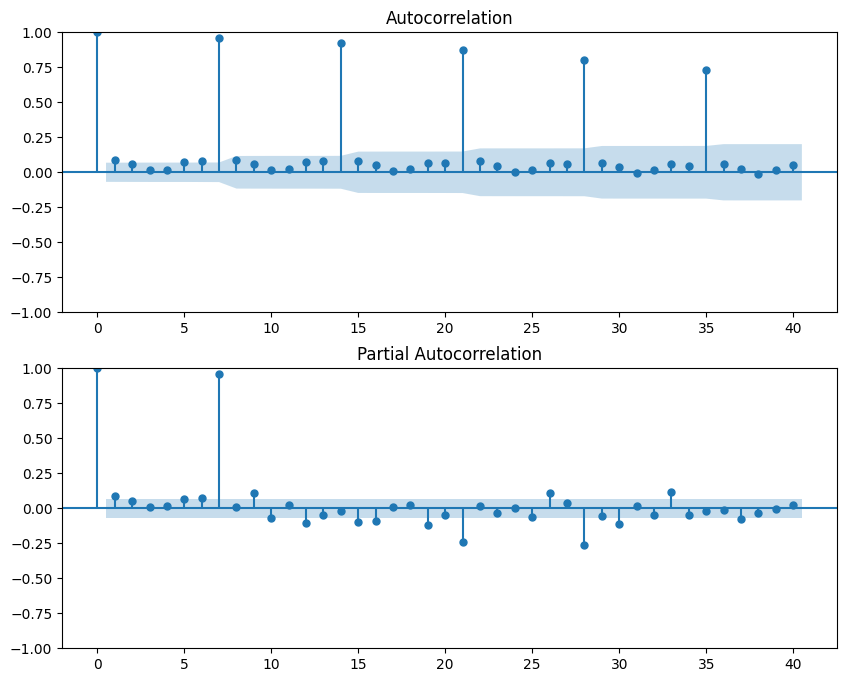

In [238]:
# Asumiendo que 'data_global' ya está preparada y es estacionaria
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig = sm.graphics.tsa.plot_acf(data_global['new_cases'], lags=40, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(data_global['new_cases'], lags=40, ax=ax[1])
plt.show()

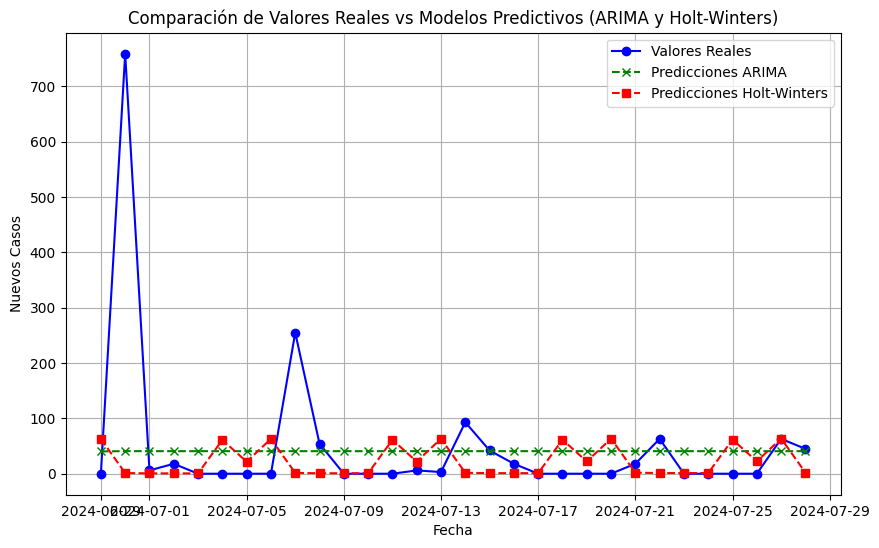

In [239]:
# Definir el conjunto de prueba (últimos 30 días de valores reales)
test_global = data_global['new_cases'][-30:]

# Asegurarse de que las predicciones tienen el mismo índice que los valores reales
arima_predictions_global.index = test_global.index
hw_predictions_global.index = test_global.index

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar los valores reales
plt.plot(test_global.index, test_global, label='Valores Reales', color='blue', marker='o')

# Graficar las predicciones de ARIMA
plt.plot(arima_predictions_global.index, arima_predictions_global, label='Predicciones ARIMA', color='green', linestyle='--', marker='x')

# Graficar las predicciones de Holt-Winters
plt.plot(hw_predictions_global.index, hw_predictions_global, label='Predicciones Holt-Winters', color='red', linestyle='--', marker='s')

# Añadir títulos y etiquetas
plt.title('Comparación de Valores Reales vs Modelos Predictivos (ARIMA y Holt-Winters)')
plt.xlabel('Fecha')
plt.ylabel('Nuevos Casos')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()